## Predicting US Election Result Sentiment Analysis

In [127]:
import pandas as pd #data manipulation and analysis library
import numpy as np#scientific computing library
import seaborn as sns #Data visualization library based on Matplotlib
import matplotlib.pyplot as plt#plotting library
from textblob import TextBlob # processed textual data library tool (already trained on numerous textual data
import warnings # For identify the warning
warnings.filterwarnings('ignore')#ignore warning
import plotly.graph_objects as go
import plotly


According to the reports of “The New York Times”, mostly everyone has dropped out till April 2020 who was running 
for Presidential election and the only left ones are Donald Trump and Joe Biden now. 
So, I have done a small analysis for trying to predict the winner of this election.
The datasets can be downold by uusing this link.
https://github.com/amankharwal/Website-data/blob/master/US%20Election%20using%20twitter%20sentiment.rar

Read the data set

In [45]:
trump_re = pd.read_csv("Trumpall2.csv")
biden_re = pd.read_csv("Bidenall2.csv")

In [46]:
print(trump_re.head())
print(biden_re.head())

              user                                               text
0      manny_rosen   @sanofi please tell us how many shares the Cr...
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...
4    James09254677   After 4 years you think you would have figure...
           user                                               text
0   MarkHodder3    @JoeBiden And we’ll find out who won in 2026...
1    K87327961G  @JoeBiden Your Democratic Nazi Party cannot be...
2      OldlaceA                        @JoeBiden So did Lying Barr
3    penblogger  @JoeBiden It's clear you didnt compose this tw...
4  Aquarian0264         @JoeBiden I will vote in person thank you.


In [47]:
# Find the length of the twitter
print(" Lenngth of Reviews regarding Trump"+" " + str(len(trump_re)))
print(" Lenngth of Reviews regarding biden"+" " + str(len(biden_re)))

 Lenngth of Reviews regarding Trump 2788
 Lenngth of Reviews regarding biden 2540


In [48]:
print(trump_re['text'])

0        @sanofi please tell us how many shares the Cr...
1        https://t.co/atM98CpqF7  Like, comment, RT #P...
2        Your AG Barr is as useless &amp; corrupt as y...
3        Mr. Trump! Wake Up!  Most of the comments bel...
4        After 4 years you think you would have figure...
                              ...                        
2783    @realDonaldTrump For the 1/100 time, absentee ...
2784    @realDonaldTrump If you’re so scared of losing...
2785    @realDonaldTrump I rarely get involved with fo...
2786    @realDonaldTrump This is the moment when Trump...
2787       @realDonaldTrump I’m sorry, Donald. No. #POTUS
Name: text, Length: 2788, dtype: object


In [49]:
# Find the polarity of both twitter
def find_pol(review):
    return TextBlob(review).sentiment.polarity
trump_re["polarity"] = trump_re["text"].apply(find_pol)
print(trump_re.tail())

biden_re["polarity"] = biden_re["text"].apply(find_pol)
print(biden_re.tail())

                 user                                               text  \
2783          4diva63  @realDonaldTrump For the 1/100 time, absentee ...   
2784         hidge826  @realDonaldTrump If you’re so scared of losing...   
2785     SpencerRossy  @realDonaldTrump I rarely get involved with fo...   
2786  ScoobyMcpherson  @realDonaldTrump This is the moment when Trump...   
2787          bjklinz     @realDonaldTrump I’m sorry, Donald. No. #POTUS   

      polarity  
2783     0.000  
2784     0.000  
2785     0.225  
2786     0.000  
2787    -0.500  
             user                                               text  polarity
2535    meryn1977  @JoeBiden You'll just try to calm those waters...      0.15
2536  BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...      0.00
2537     KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...      0.00
2538   LeslyeHale  @JoeBiden Trump wants our children back at sch...      0.10
2539     rerickre  @JoeBiden ... and I know, b

In [50]:
# Exctract the polarity value equal to zero and remove that raw from each data set
# Remove the polarity value equal to zero regarding Trump twitter

trump_re_netural= trump_re[trump_re['polarity'] == 0.0000]
cond1=trump_re['polarity'].isin(trump_re_netural['polarity'])
trump_re.drop(trump_re[cond1].index, inplace = True)

#Remove the polarity value equal to zero regarding Biden twitter

biden_re_netural = biden_re[biden_re['polarity'] == 0.0000]
cond2=biden_re['polarity'].isin(biden_re_netural['polarity'])
biden_re.drop(biden_re[cond2].index, inplace = True)
print(trump_re.shape)
print(biden_re.shape)

(1324, 3)
(1031, 3)


In [167]:
# Convert the polarity values in to sentiment if the polarity values grater than 0 then possitive sentiments else negative
trump_re['sentiment']= np.where(trump_re['polarity']>0.5,"positive","negative")
biden_re['sentiment']= np.where(biden_re['polarity']>0.5,"positive","negative")

In [168]:
print("Sentiment for Reviews for regarding trump twitter"+"\n" + str(trump_re['sentiment'].value_counts()))
print("Sentiment for Reviews for regarding biden twitter"+"\n" + str(biden_re['sentiment'].value_counts()))

Sentiment for Reviews for regarding trump twitter
negative    1165
positive     159
Name: sentiment, dtype: int64
Sentiment for Reviews for regarding biden twitter
negative    910
positive    121
Name: sentiment, dtype: int64


So, After removing the neural twitte from the both data set it has differnt size of twitte so, 
now we will try to bring both data set twitter in to same length as 1000

In [169]:
# Donald Trump
remove_trump =324
drop_indices_tr = np.random.choice(trump_re.index, remove_trump, replace=False)
trump_subset = trump_re.drop(drop_indices_tr)
print("Trump twitter after bring the same size" + " "+ str(trump_subset.shape))
# Joe Biden
remove_biden =31
drop_indices_bi = np.random.choice(biden_re.index, remove_biden, replace=False)
biden_subset = biden_re.drop(drop_indices_bi,axis=0)
print("Biden twitter after bring the same size" + " "+ str(biden_subset.shape))

Trump twitter after bring the same size (1000, 4)
Biden twitter after bring the same size (1000, 4)


Text(0.5, 1.0, 'Biden polarity varition')

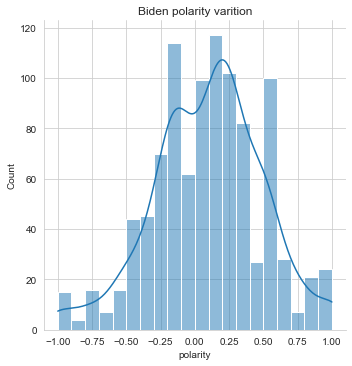

In [160]:
# Plot the displot for Biden twitter
sns.displot(biden_subset['polarity'],kde='False')
plt.title("Biden polarity varition")

Text(0.5, 1.0, 'Trump polarity varition')

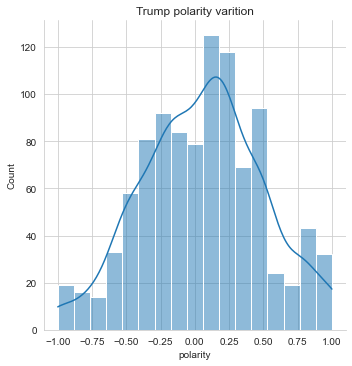

In [161]:
# Plot the displot graph for Trump twitter polarity
sns.displot(trump_subset['polarity'],kde='False')
plt.title("Trump polarity varition")

Text(0.5, 1.0, 'Biden polarity varition')

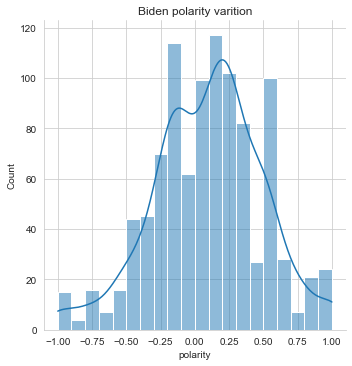

In [162]:
# Plot the displot graph for Biden twitter polarity
sns.displot(biden_subset['polarity'],kde='False')
plt.title("Biden polarity varition")

Let's try to plot box plot for identify the outlayer in the both data set

Text(0.5, 1.0, 'Trump polarity varition')

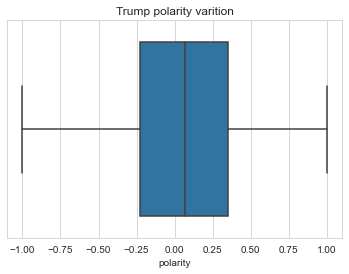

In [79]:
# Plot the displot graph for Trump twitter polarity
sns.boxplot(trump_subset['polarity'])
plt.title("Trump polarity varition")

Text(0.5, 1.0, 'Biden polarity varition')

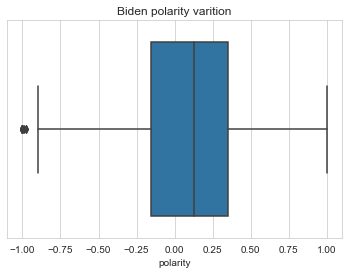

In [163]:
# Plot the displot graph for Bidentwitter polarity
sns.boxplot(biden_subset['polarity'])
plt.title("Biden polarity varition")

Find the mean and standard deviation for each polarity values

In [170]:
# Mean and Standard Deviation for the possitive sentiment
print("Biden Positive twitte polarity mean"+ " "+ str(biden_subset[biden_subset['polarity']>0].mean()))
print("Trump Positive twitte polarity mean"+ " "+ str(trump_subset[trump_subset['polarity']>0].mean()))
print("Biden Positive twitte polarity Standard deviation "+ " "+ str(biden_subset[biden_subset['polarity']>0].std()))
print("Trump Positive twitte polarity Standard deviation "+ " "+ str(trump_subset[trump_subset['polarity']>0].std()))


Biden Positive twitte polarity mean polarity    0.349955
dtype: float64
Trump Positive twitte polarity mean polarity    0.374997
dtype: float64
Biden Positive twitte polarity Standard deviation  polarity    0.239828
dtype: float64
Trump Positive twitte polarity Standard deviation  polarity    0.267162
dtype: float64


Here, we can see Trump has higher positive sentiment rather than Biden.  As well as if we consider the Standard deviation Trump has more deviation than Biden

In [171]:
# Mean and Standard Deviation for the negative sentiment
print("Biden Negative twitte polarity mean"+ " "+ str(biden_subset[biden_subset['polarity']<0].mean().abs()))
print("Trump Negative twitte polarity mean"+ " "+ str(trump_subset[trump_subset['polarity']<0].mean().abs()))
print("Biden Negative twitte polarity Standard deviation "+ " "+ str(biden_subset[biden_subset['polarity']<0].std()))
print("Trump Negative twitte polarity Standard deviation "+ " "+ str(trump_subset[trump_subset['polarity']<0].std()))


Biden Negative twitte polarity mean polarity    0.293981
dtype: float64
Trump Negative twitte polarity mean polarity    0.324436
dtype: float64
Biden Negative twitte polarity Standard deviation  polarity    0.242936
dtype: float64
Trump Negative twitte polarity Standard deviation  polarity    0.2454
dtype: float64


Here, we can see Trump has higher negative sentiment rather than Biden 
As well as if we consider the Standard deviation Trump has more deviation than Biden. So, 
Now we can tell Trump has more negative twites than Biden.


### Analyze both Twitter reviews together

In [172]:
# Group the sentiment categories
trump_count= trump_subset.groupby('sentiment').count()
biden_count= biden_subset.groupby('sentiment').count()
print(trump_count)
print(biden_count)

           user  text  polarity
sentiment                      
negative    877   877       877
positive    123   123       123
           user  text  polarity
sentiment                      
negative    881   881       881
positive    119   119       119


In [173]:
#Find the percentage for the Negative polarity
biden_neg = (biden_count['polarity'][0]/1000)*100
trump_neg = (trump_count['polarity'][0]/1000)*100

print("Binden twitter Negative twitte Percentage"+" " + str(biden_neg))
print("Trump twitter Negative twitte Percentage"+" " + str(trump_neg))

Binden twitter Negative twitte Percentage 88.1
Trump twitter Negative twitte Percentage 87.7


In [181]:
#Find the percentage for the Positive polarity
biden_pos = (biden_count['polarity'][1]/1000)*100
trump_pos = (trump_count['polarity'][1]/1000)*100
print("Binden twitter positive twitte Percentage"+" " + str(biden_pos))
print("Trump twitter positive twitte Percentage"+" " + str(trump_pos))

Binden twitter positive twitte Percentage 11.899999999999999
Trump twitter positive twitte Percentage 12.3


In [182]:
#Make the combined both of them positive twitte
positive_list = [biden_pos, trump_pos]
negative_list = [biden_neg, trump_neg]
print(possitive_list)
print(negative_list)

[11.899999999999999, 12.3]
[88.1, 87.7]


In [183]:
poltican = ['Joe Biden','Donald Trump']
fig = go.Figure(data=[
    go.Bar(name='Positive', x=poltican, y=positive_list),
    go.Bar(name='Negative', x=poltican, y=negative_list)])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

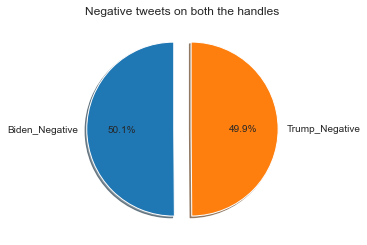

In [184]:
labels =  ['Biden_Negative','Trump_Negative'] 
sizes = negative_list
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Negative tweets on both the handles')
plt.show()

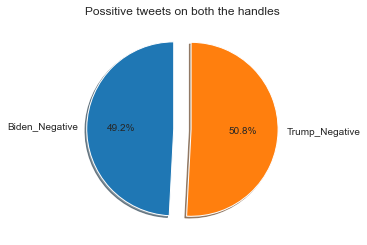

In [185]:
labels =  ['Biden_Negative','Trump_Negative'] 
sizes = possitive_list
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Possitive tweets on both the handles')
plt.show()